In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [86]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

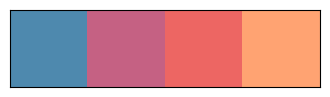

In [16]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [17]:
df=pd.read_csv(r"C:\Users\AMIT DUBEY\Downloads\Housing - Housing.csv")

In [18]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [19]:
df.shape

(545, 13)

In [20]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [21]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [84]:
print(f"Data types of data columns:{df.dtypes}")

Data types of data columns:price               float64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int32
guestroom             int32
basement              int32
hotwaterheating       int32
airconditioning       int32
parking               int64
prefarea              int32
furnishingstatus      int32
dtype: object


# Exploratory Data Analysis - Visualisation will statrs from here

In [23]:
sns.set_style("whitegrid")

In [24]:
df.head(10)

price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
5              no             yes        2      yes   semi-furnished  
6              no             yes        2      yes   semi-furnished  
7              no              no        0       no      unfurnished  
8              no             yes        2      yes        furnished  
9              no             yes        1      yes      unfurnished

<AxesSubplot:xlabel='price', ylabel='Density'>

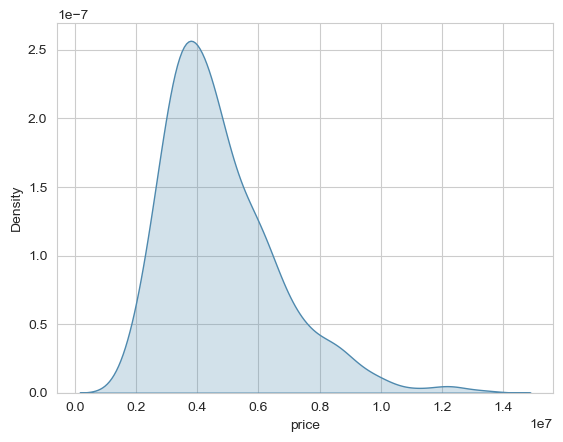

In [25]:
sns.kdeplot(x=df['price'],shade=True)

<AxesSubplot:xlabel='area', ylabel='Density'>

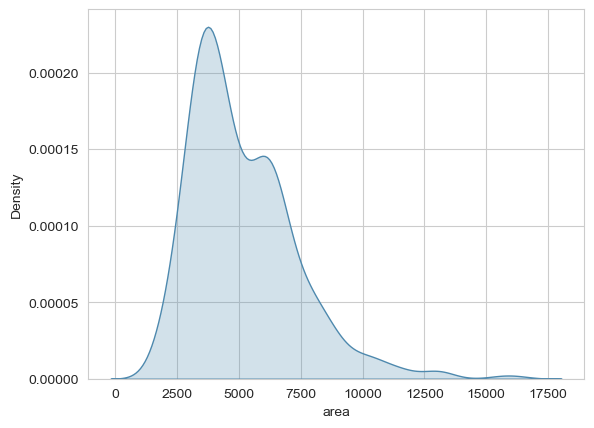

In [26]:
sns.kdeplot(x=df['area'],shade=True)

Category Plot
Creating a function for calling cat plot again and again:

In [27]:
def cat_plot(data,temp):
    sns.catplot(x=temp, y="price", data=df)
    plt.gcf().set_size_inches(6,8)
    plt.show()

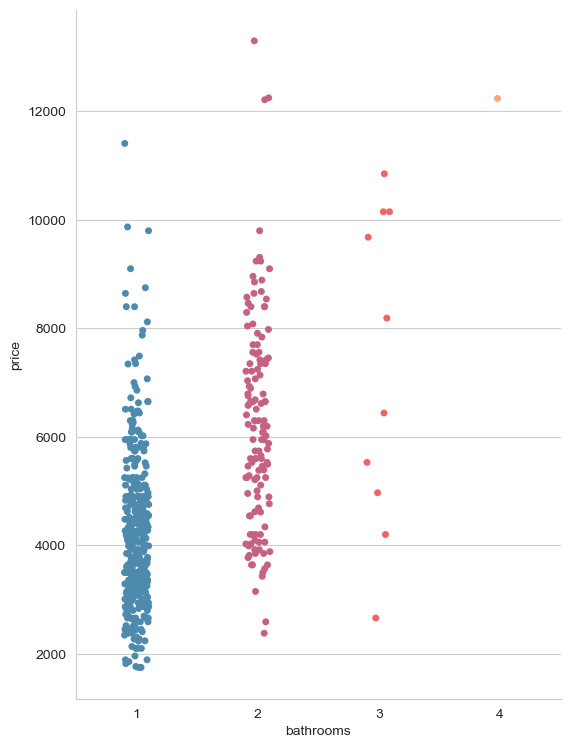

In [80]:
cat_plot(df,"bathrooms")

Most of the listings have only 1 bathroom.

Price increases as number of bathrooms number rises.

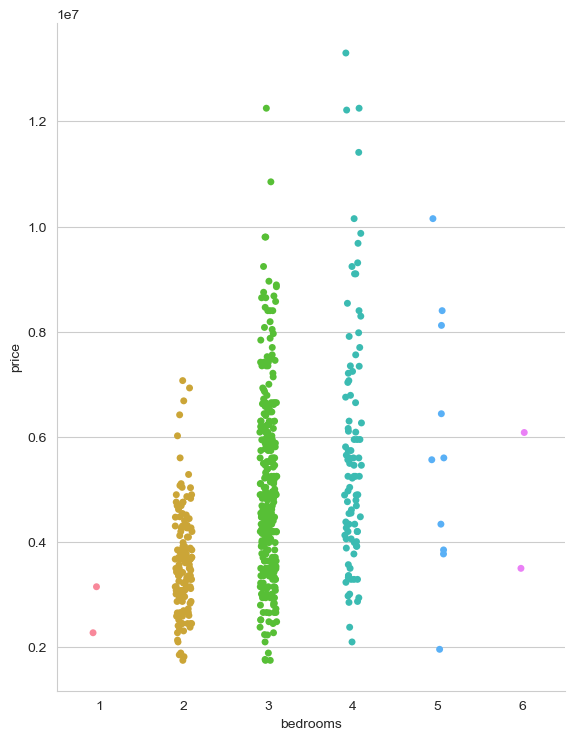

In [29]:
cat_plot(df,"bedrooms")

Most of the listings have 2-3 bedrooms.

Price increases as number of bedrooms rises.

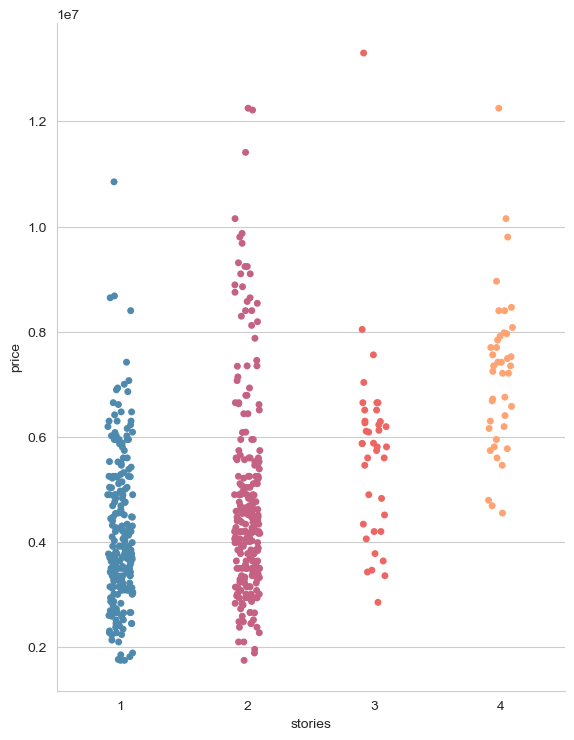

In [30]:
cat_plot(df,"stories")

Most of the listings have 1-2 stories.

Price increases as number of stories rises.

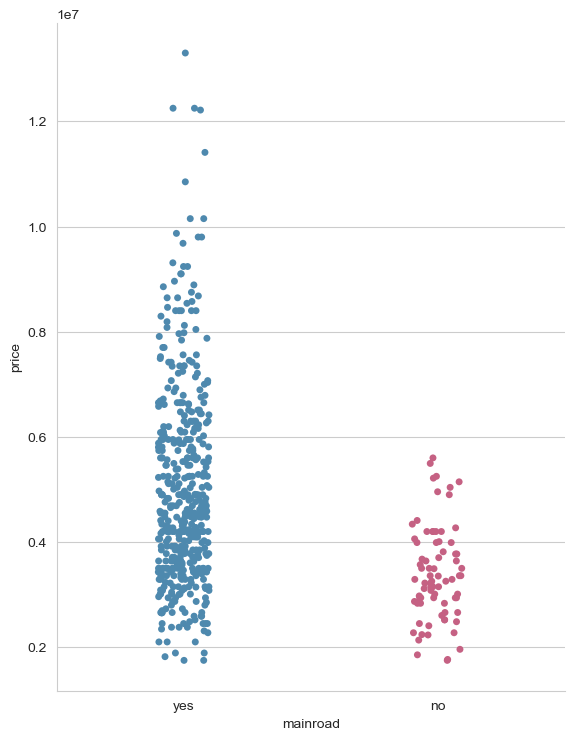

In [31]:
cat_plot(df,"mainroad")

Most of the listings are connected to mainroad

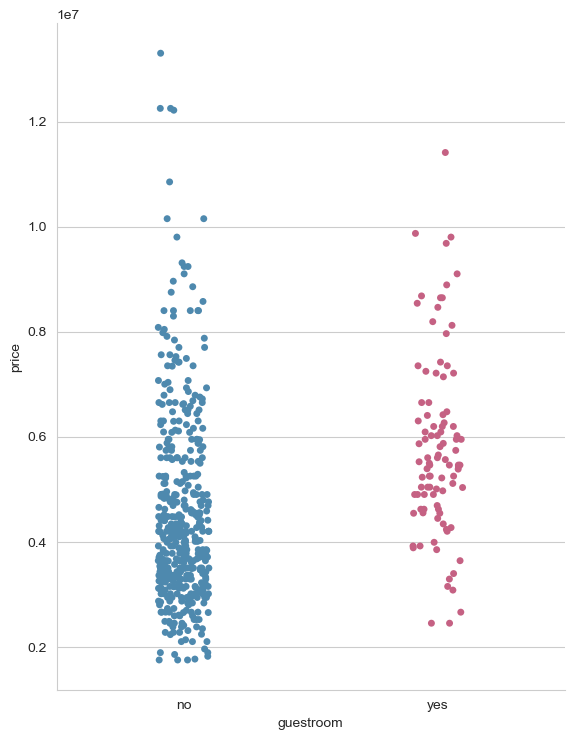

In [32]:
cat_plot(df,"guestroom")

Most listings doesn't have guestroom

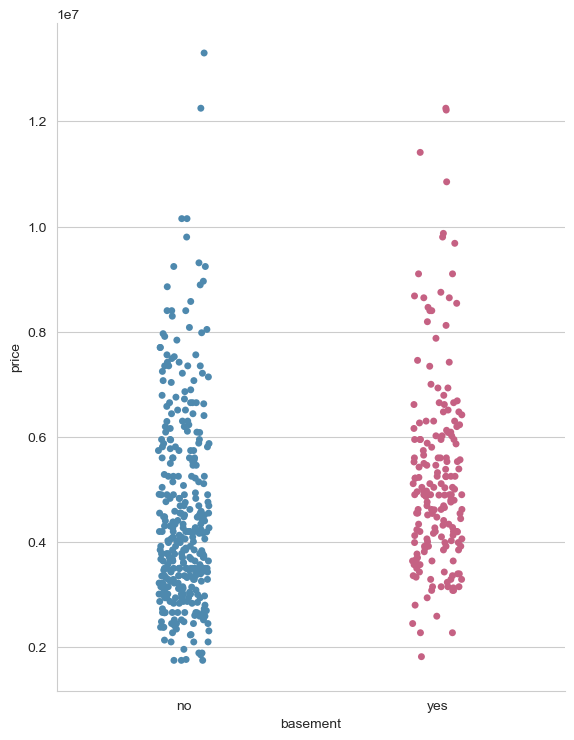

In [33]:
cat_plot(df,"basement")

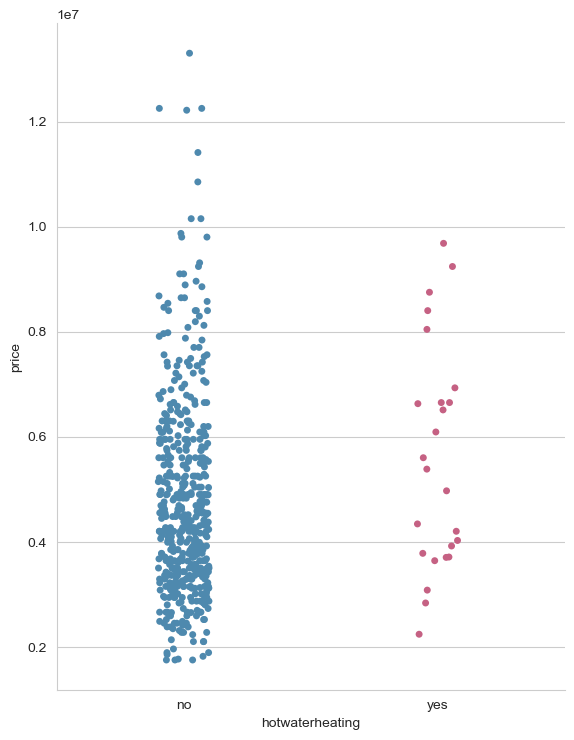

In [34]:
cat_plot(df,"hotwaterheating")

Most of the Listings doesn't have Hot Water Heating

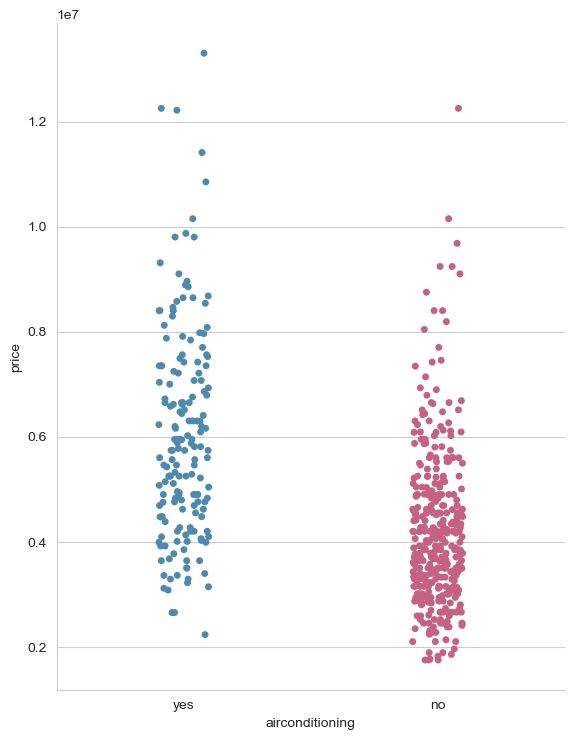

In [35]:
cat_plot(df,"airconditioning")

Most listings doesn't have airconditioning.

Price of listings with airconditioners are higher

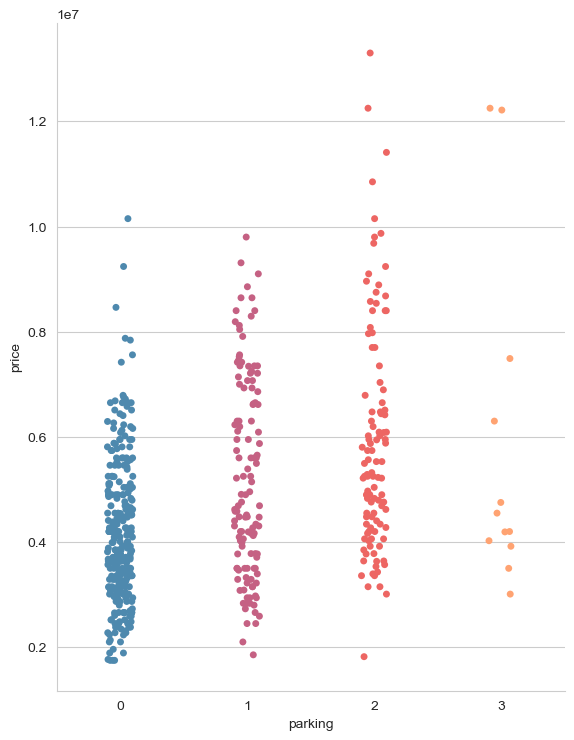

In [36]:
cat_plot(df,"parking")

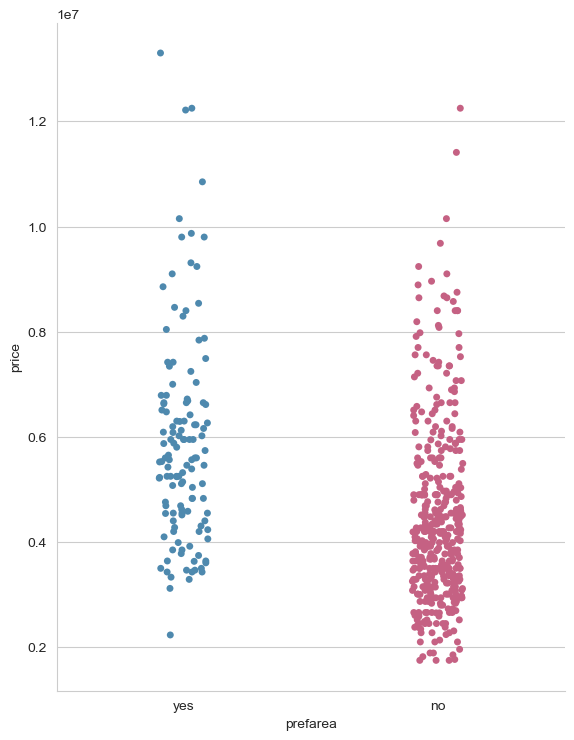

In [37]:
cat_plot(df,"prefarea")

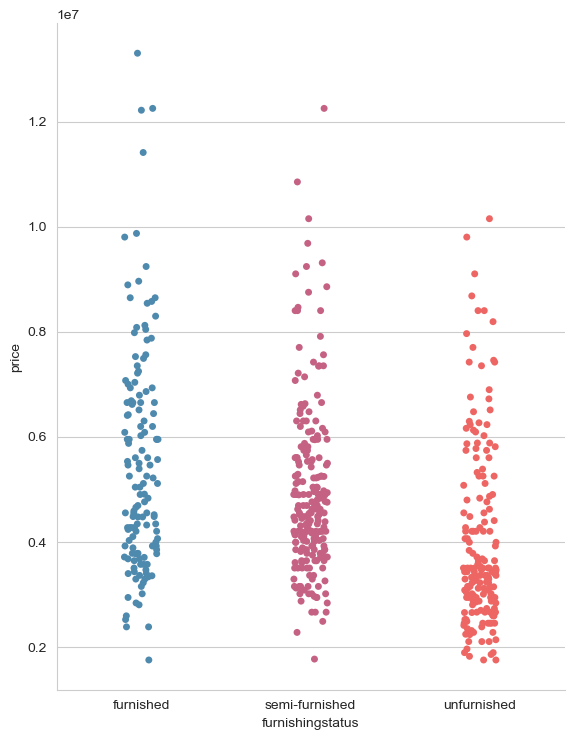

In [38]:
cat_plot(df,"furnishingstatus")

In [39]:
px.scatter(df,x='area',y='price',template='plotly_dark')

In [40]:
def scatter_plot(data,temp):
    sns.scatterplot(x="area", y="price",hue=temp, data=data)
    plt.gcf().set_size_inches(6,8)
    plt.show()

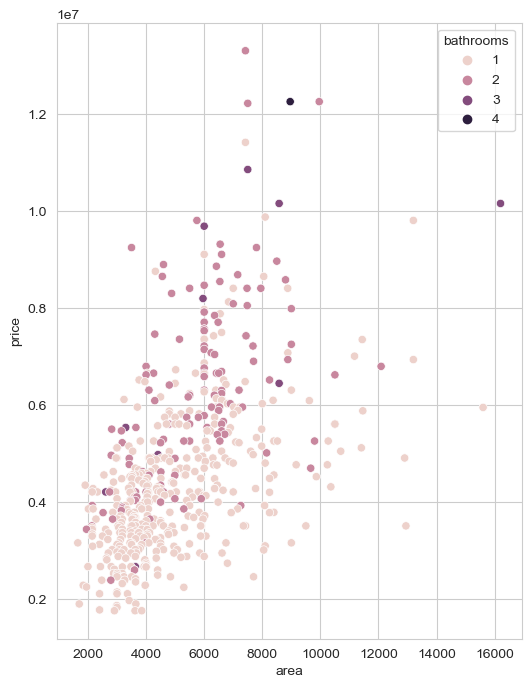

In [41]:
scatter_plot(df,"bathrooms")

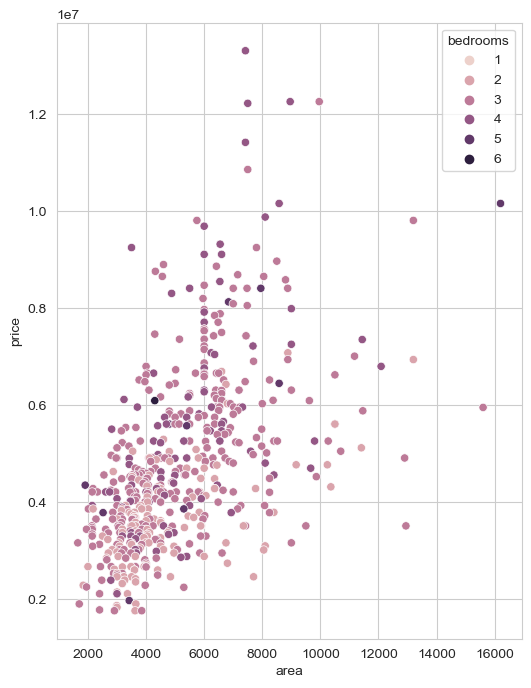

In [42]:
scatter_plot(df,"bedrooms")

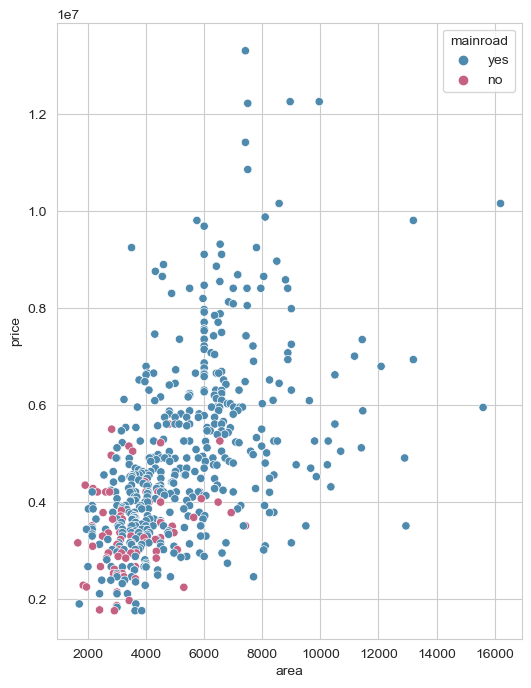

In [43]:
scatter_plot(df,"mainroad")


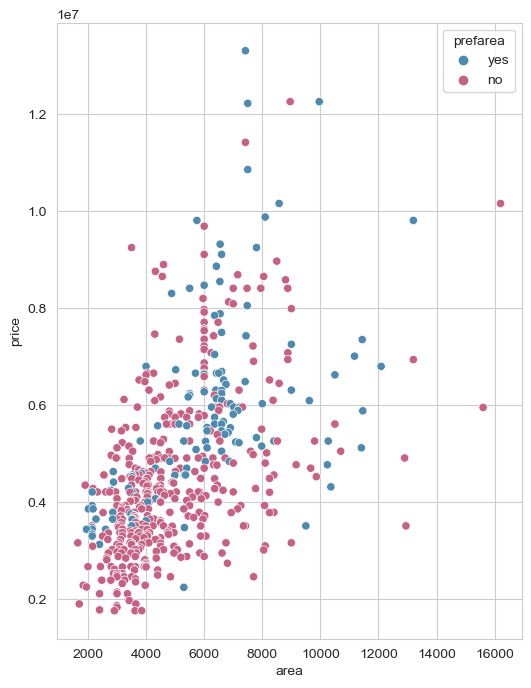

In [44]:
scatter_plot(df,"prefarea")

In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [46]:
df['mainroad']= label_encoder.fit_transform(df['mainroad'])
df['mainroad'].unique()

array([1, 0])

In [47]:
df['guestroom']= label_encoder.fit_transform(df['guestroom'])
df['guestroom'].unique()

array([0, 1])

In [48]:
df['basement']= label_encoder.fit_transform(df['basement'])
df['basement'].unique()

array([0, 1])

In [49]:
df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])
df['hotwaterheating'].unique()

array([0, 1])

In [50]:
df['airconditioning']= label_encoder.fit_transform(df['airconditioning'])
df['airconditioning'].unique()

array([1, 0])

In [51]:
df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])
df['furnishingstatus'].unique()

array([0, 1, 2])

In [52]:
df['prefarea']= label_encoder.fit_transform(df['prefarea'])
df['prefarea'].unique()

array([1, 0])

In [55]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0

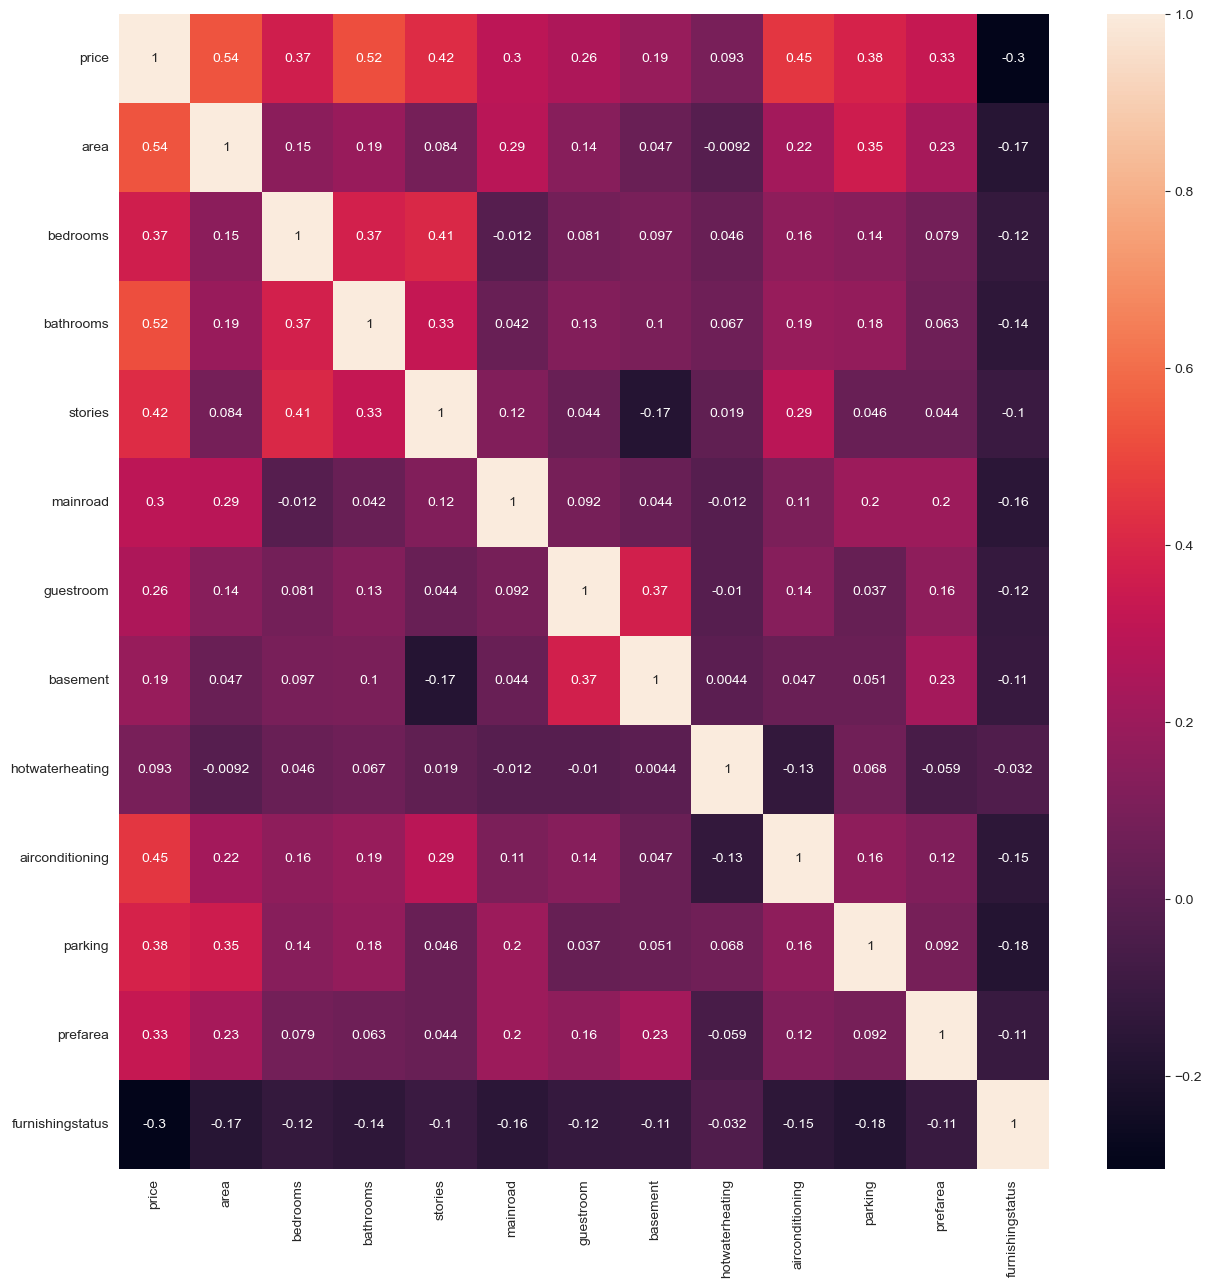

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [57]:
corr=df.corr()
corr

price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  0.234779  0.079023   0.063472  0.044425  0.199876   
furnishingstatus -0.304721 -0.171445 -0.123244  -0.143559 -0.104672 -0.156726   

                  guestroom  basement  hotwaterheating  airconditioning  \
price              0.255517  0.187057         0.093073         0.452954   
area               0.140297  0.047417        -0.009229         0.222393   
bedrooms           0.080549  0.097312         0.046049         0.160603   
bathrooms          0.126469  0.102106         0.067159         0.186915   
stories            0.043538 -0.172394         0.018847         0.293602   
mainroad           0.092337  0.044002        -0.011781         0.105423   
guestroom          1.000000  0.372066        -0.010308         0.138179   
basement           0.372066  1.000000         0.004385         0.047341   
hotwaterheating   -0.010308  0.004385         1.000000        -0.130023   
airconditioning    0.138179  0.047341        -0.130023         1.000000   
parking            0.037466  0.051497         0.067864         0.159173   
prefarea           0.160897  0.228083        -0.059411         0.117382   
furnishingstatus  -0.118328 -0.112831        -0.031628        -0.150477   

                   parking  prefarea  furnishingstatus  
price             0.384394  0.329777         -0.304721  
area              0.352980  0.234779         -0.171445  
bedrooms          0.139270  0.079023         -0.123244  
bathrooms         0.177496  0.063472         -0.143559  
stories           0.045547  0.044425         -0.104672  
mainroad          0.204433  0.199876         -0.156726  
guestroom         0.037466  0.160897         -0.118328  
basement          0.051497  0.228083         -0.112831  
hotwaterheating   0.067864 -0.059411         -0.031628  
airconditioning   0.159173  0.117382         -0.150477  
parking           1.000000  0.091627         -0.177539  
prefarea          0.091627  1.000000         -0.107686  
furnishingstatus -0.177539 -0.107686          1.000000

In [58]:
df['price']=df['price']/1000
df['price']

0      13300.00
1      12250.00
2      12250.00
3      12215.00
4      11410.00
         ...   
540     1820.00
541     1767.15
542     1750.00
543     1750.00
544     1750.00
Name: price, Length: 545, dtype: float64

In [59]:
x = df.drop(['price'], axis=1)
y = df['price']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [62]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((436, 12), (109, 12), (436,), (109,))

# Linear Regression Starts

In [65]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  13300.0  7420         4          2        3         1          0         0   
1  12250.0  8960         4          4        4         1          0         0   
2  12250.0  9960         3          2        2         1          0         1   
3  12215.0  7500         4          2        2         1          0         1   
4  11410.0  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0

In [66]:
from sklearn.linear_model import LinearRegression

# Initialize a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression()

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions on the test set
y_pred = model.predict(x_test)

In [68]:
y_pred

array([ 4019.0806989 ,  6258.02176856,  4392.71913411,  7335.08221688,
        2892.85756616,  7084.65557702,  3258.63473505,  3196.49916069,
        3520.10601135,  8359.61028845,  6646.92636097,  3788.84463269,
        3734.07296468,  4616.01040973,  3946.12494406,  2023.17746847,
        3975.55448783,  3624.71696501,  3210.28274216,  4668.41138106,
        5893.71966377,  6415.68383807,  4657.03655832,  2704.09611205,
        5356.90986181,  5740.68256798,  5337.58647961,  5444.85996648,
        5702.14457144,  5865.87230433,  3307.32730668,  6299.49102684,
        7123.47995544,  2960.32686653,  4424.32319484,  5125.08185591,
        4947.69393116,  3629.02781981,  2975.42152735,  3975.08954022,
        8106.31395534,  5014.6588753 ,  6469.74969805,  3566.13931349,
        3868.65286219,  6344.993747  ,  4482.57273153,  2740.24008968,
        4105.38415298,  6518.55736177,  3976.55893953,  7056.30768946,
        2586.71416697,  2947.68780114,  3553.62439318,  5151.3864791 ,
      

In [69]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)

mse, r2

(986041.8038900269, 0.6578047592637595)

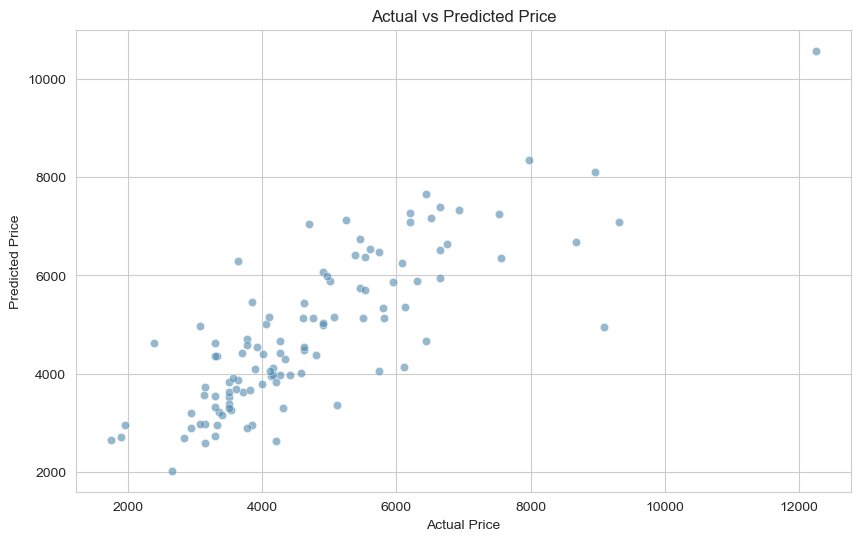

In [70]:
# Scatter plot of actual vs predicted salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()

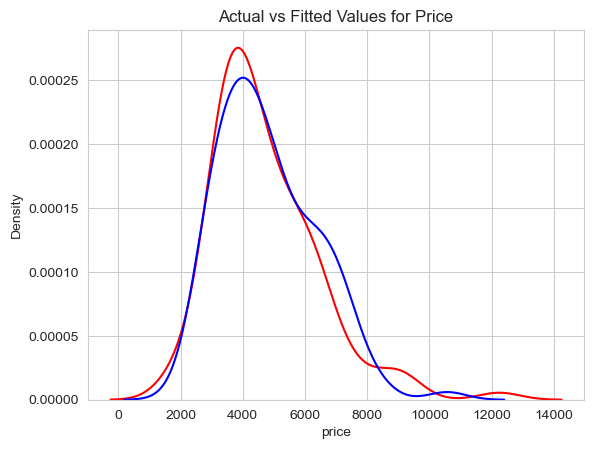

In [71]:


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

# Random Forest Regressor has been initiated

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=420)

# Fit the model to the training data
rf_model.fit(x_train, y_train)

# Use the model to make predictions on the test set
rf_y_pred = rf_model.predict(x_test)

# Calculate the mean squared error
rf_mse = mean_squared_error(y_test, rf_y_pred)

# Calculate the coefficient of determination (R^2 score)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_r2

(1161956.2516286778, 0.5967555354322471)

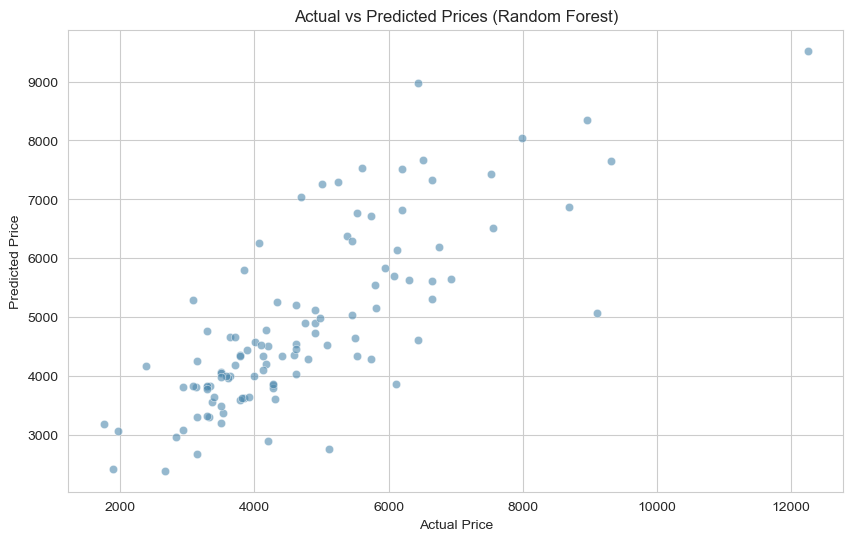

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.grid(True)
plt.show()

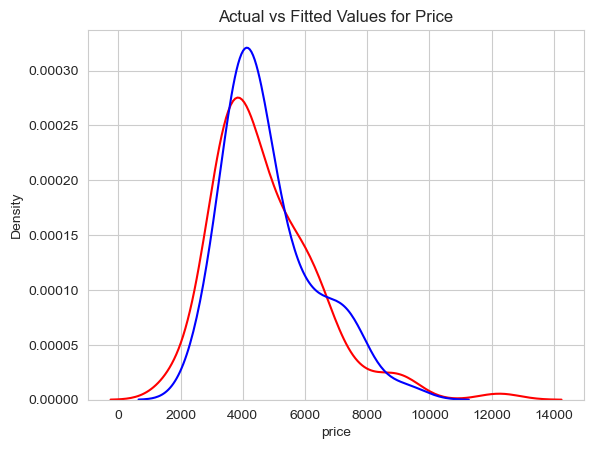

In [74]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

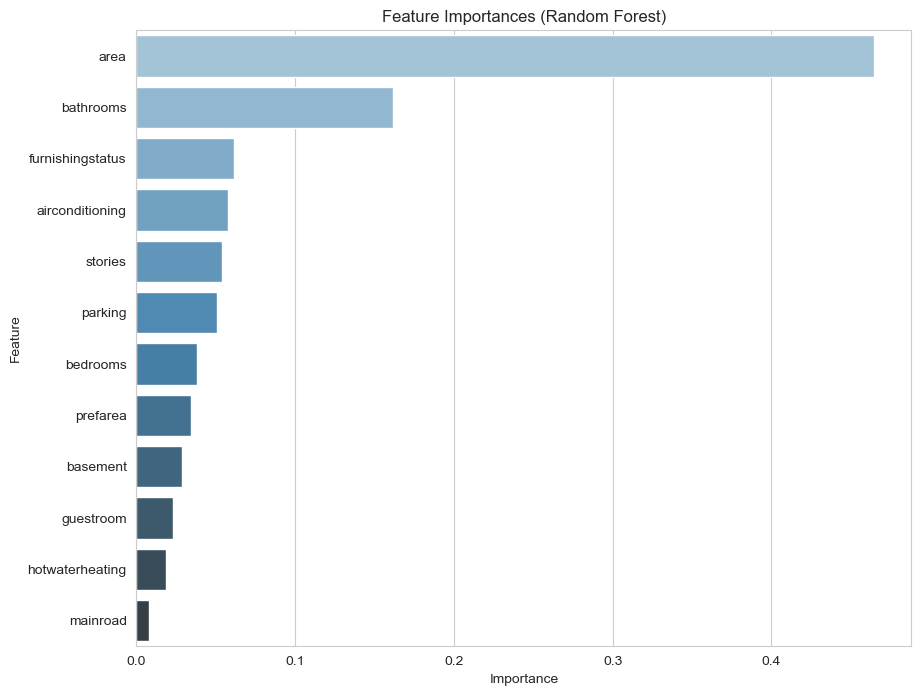

In [75]:
# Get feature importances from the random forest model
importances = rf_model.feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})

# Sort the dataframe by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette="Blues_d")
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [76]:
from xgboost import XGBRegressor

# Initialize a XGBRegressorr
xg_model = XGBRegressor(n_estimators=500, random_state=42)

# Fit the model to the training data
xg_model.fit(x_train, y_train)

# Use the model to make predictions on the test set
xg_y_pred = rf_model.predict(x_test)

# Calculate the mean squared error
xg_mse = mean_squared_error(y_test, rf_y_pred)

# Calculate the coefficient of determination (R^2 score)
xg_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_r2

(1161956.2516286778, 0.5967555354322471)

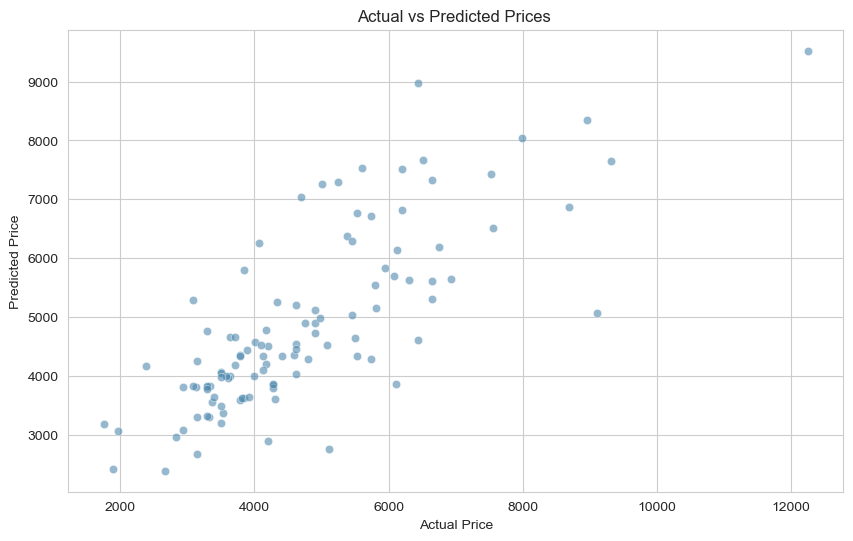

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=xg_y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices ')
plt.grid(True)
plt.show()